### mall Customers segmentation

## Understanding the Provided Dataset

The data is related to direct customer database who have already visited and spent at malls. The Spending Score shows how high the customers spend and the dataset also shows the Annual Income of the Customers

Goal:- The goal is to segment the customers based on the features in the dataset so as to target specific customers to increase sales in the Mall

**Features:**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|CustomerID|numeric|IDs given to the Customer|  
|Gender|String|Gender of the Customers who visited the Mall|
|Age|integer|Age of the Customers|
|Annual Income|numeric|Annual Income of the Customers in terms of k$|  
|Spending Score (1-100)|numeric|Spending Scores of the Customers, from 1-100|  
 
Customers with High Spending Score are preferred

## Importing Necessary Libraries

The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## Loading the dataset

In [2]:
df = pd.read_csv("MallCustomers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Cleaning and Preprocessing

In [3]:
df = df.rename(columns={'Genre': 'Gender'})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Checking Null Values

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.shape

(200, 5)

#### Checking Correlation

In [6]:
corr = df.corr()
corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

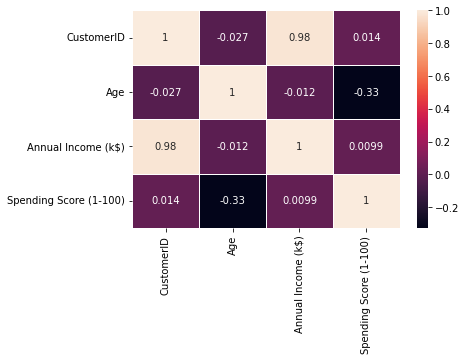

In [7]:
sns.heatmap(corr, annot=True,linewidths=1)

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Display Gender Distribution Using Bar Graph (barplot)

In [9]:
genders = df['Gender'].value_counts()
genders

Female    112
Male       88
Name: Gender, dtype: int64

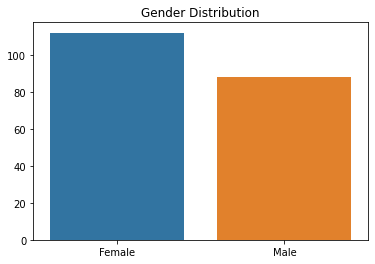

In [10]:
plt.figure()
plt.title("Gender Distribution")
sns.barplot(x=genders.index, y=genders.values)
plt.show()

### Display Age Using Distribution Graph (distplot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


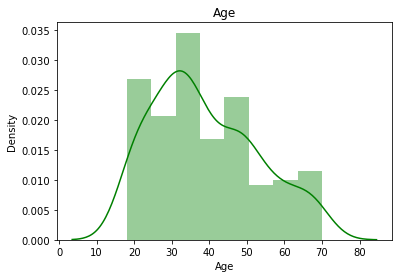

In [11]:
plt.figure()
plt.title("Age")
g = sns.distplot(df["Age"], color="Green")
plt.show()

- Customers with age between 20-60 have the highest frequency as per the distribution
- Customers with age < 20 and age > 60 have the least frequency

### Display Annual Income Using Distribution Graph (distplot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


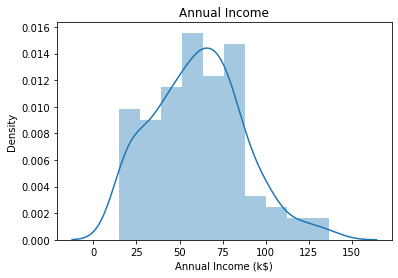

In [12]:
plt.figure()
plt.title("Annual Income")
g = sns.distplot(df["Annual Income (k$)"])
plt.show()

- Customers with Annual Income between 50k-85k US Dollars have the highest frequency as per the distribution
- Customers with Annual Income < 25k and Annual Income > 100 US Dollars have the least frequency

### Display Spending Scores Using Distribution Graph (distplot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


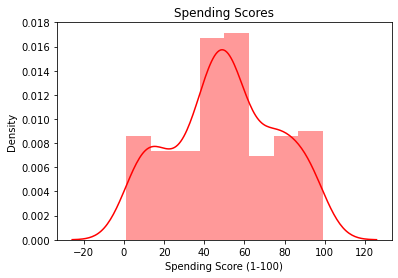

In [13]:
plt.figure()
plt.title("Spending Scores")
g = sns.distplot(df["Spending Score (1-100)"],color="Red")
plt.show()

- Customers with Spending Scores between 40-70 have the highest frequency as per the distribution
- Customers with Spending Scores < 20 and > 80 have the least frequency

### Pie Chart to check the distribution of % of customers as per gender. (pie)

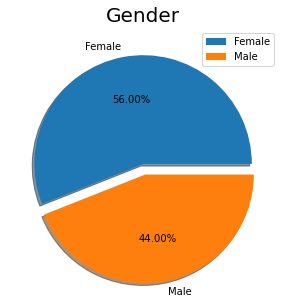

In [14]:
labels = ['Female', 'Male'] 
size = df['Gender'].value_counts()
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, explode=explode, labels=labels, shadow=True, autopct = '%.2F%%') 
plt.title('Gender', fontsize = 20) 
plt.legend() 
plt.show()

- Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%.
- Population of Females is comparatively higher than Males.

### Bar Graph to check the distribution of number of customers in each age group.

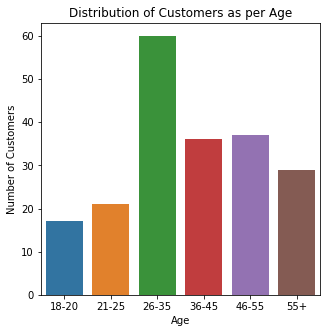

In [15]:
age_18_20 = df.Age[(df.Age <= 20) & (df.Age >= 18)]
age_21_25 = df.Age[(df.Age <= 25) & (df.Age >= 21)]
age_26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age_36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age_46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age_55_plus = df.Age[df.Age >= 56]

x = ["18-20","21-25","26-35","36-45","46-55","55+"]
y = [len(age_18_20.values), len(age_21_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55_plus.values)]

sns.barplot(x=x, y=y)
plt.title("Distribution of Customers as per Age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

- It can be seen that the Ages from 26 to 35 are very much frequently coming to malls and purchasing.
- People of Age 55+ are very less frequent in the Malls.

## Bar Graph to check the number of customers as per the Spending Scores.

In [16]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

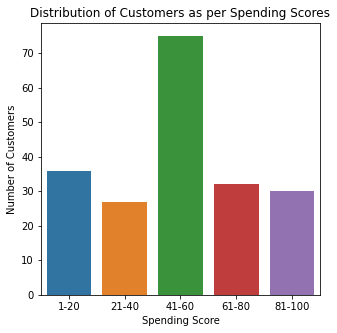

In [17]:
spend_score_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
spend_score_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
spend_score_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
spend_score_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
spend_score_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

spend_score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
spend_score_y = [len(spend_score_1_20.values), len(spend_score_21_40.values), len(spend_score_41_60.values), len(spend_score_61_80.values), len(spend_score_81_100.values)]

sns.barplot(x=spend_score_x, y=spend_score_y)
plt.title("Distribution of Customers as per Spending Scores")
plt.xlabel("Spending Score")
plt.ylabel("Number of Customers")
plt.show()

- It can be seen that the Spending Scores from 41 to 60 are very much frequently coming to malls and purchasing.
- People of very high spending scores (81-100) have a less frequency (Close to 30).

## Bar Graph to check the number of customers as per the Annual Income.

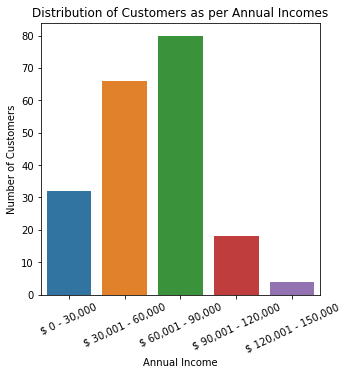

In [18]:
ann_inc_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ann_inc_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ann_inc_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ann_inc_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ann_inc_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

ann_inc_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
ann_inc_y = [len(ann_inc_0_30.values), len(ann_inc_31_60.values), len(ann_inc_61_90.values), len(ann_inc_91_120.values), len(ann_inc_121_150.values)]

plot = sns.barplot(x=ann_inc_x, y=ann_inc_y)
plot.set_xticklabels(plot.get_xticklabels(), rotation=25)
plt.title("Distribution of Customers as per Annual Incomes")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.show()

- This is a chart to better explain the Distribution of Each Income level.
- There are customers in the mall with a very much comparable frequency with their Annual Income ranging from 30k US Dollars to 120K US Dollars. 
- There are more Customers in the Mall who have their Annual Income as 60k US Dollars to 90k US Dollars.

### Scatterplot of the Annual Income vs Spending Scores of the Customer

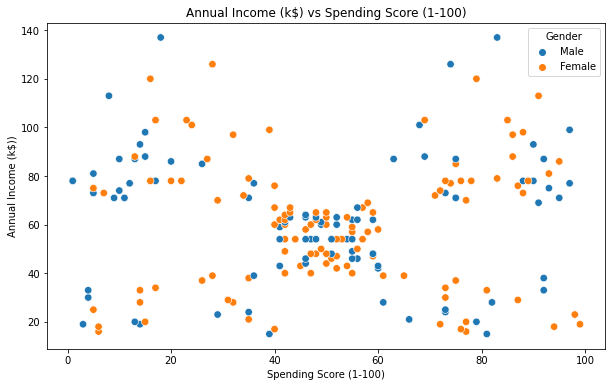

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['Spending Score (1-100)'],y = df['Annual Income (k$)'],
                s = 55, hue=df["Gender"])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$))') 
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()

- We can see the clusters forming from the above plotted scatter plots. 
- We can also get a rough intution on the number of clusters which we can form.

### Scatterplot of the Age vs Spending Scores of the Customer based on Gender

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


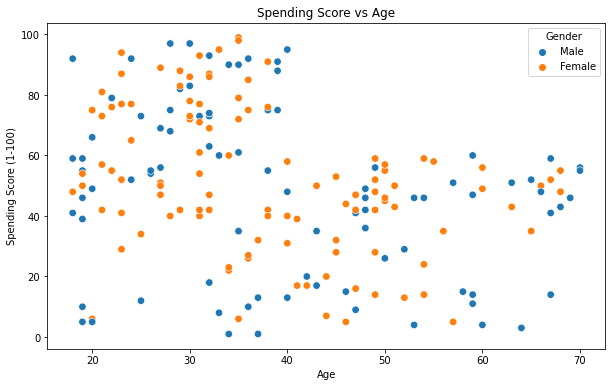

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["Age"],df["Spending Score (1-100)"],hue=df["Gender"], s = 55)
plt.title("Spending Score vs Age")
plt.show()

- We can see in scatter plot that most of the people with very high spending are of age below 40.

### Scatterplot of the Age vs Spending Scores of the Customer based on Gender

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


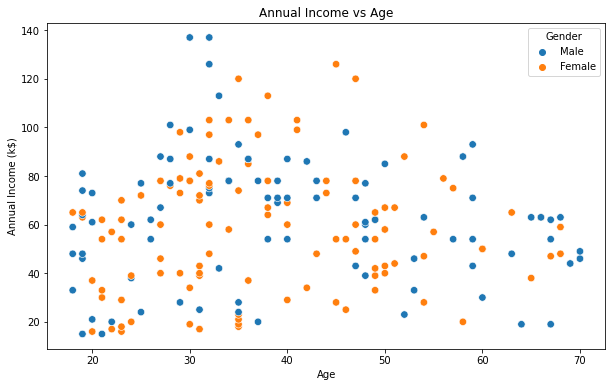

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["Age"],df["Annual Income (k$)"],hue=df["Gender"], s = 55)
plt.title("Annual Income vs Age")
plt.show()

- We can see in scatter plot that most of the people annual income is more when there age is in between 30 to 50.

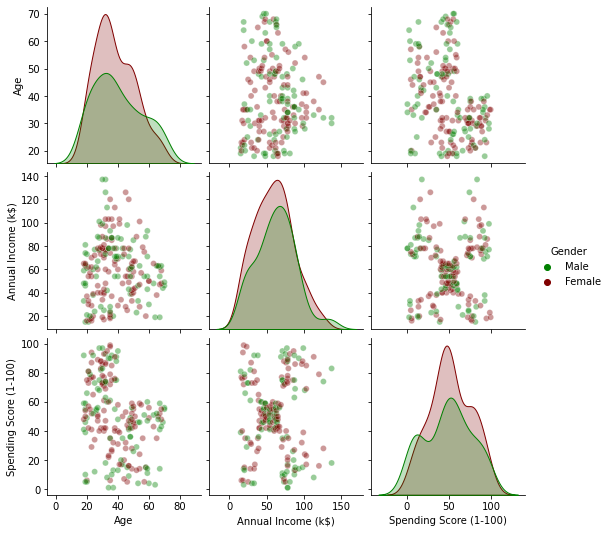

In [22]:
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)", "Gender"]
sns.pairplot(data=df[columns],hue="Gender", palette=['green','maroon'], plot_kws={'alpha': 0.4},kind='scatter', diag_kind='kde')
plt.show()

### Line Plot of Annual Incomes

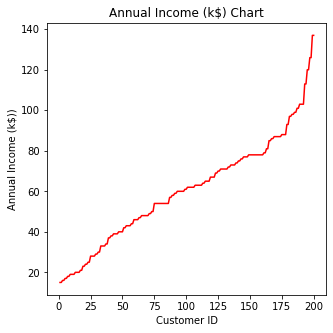

In [23]:
plt.plot(df['CustomerID'], df['Annual Income (k$)'], color='red')
plt.xlabel('Customer ID')
plt.ylabel('Annual Income (k$))') 
plt.title('Annual Income (k$) Chart')
plt.show()

- Annual Income shows a very high correlation with Customer Id
- We can conclude that the data is arranged as per the Annual Income of the Customers visiting the Mall (Customers with high Annual Income will have high IDs)
- We can target customers with high Customer Ids for better sales

### Line Plot of Spending Scores

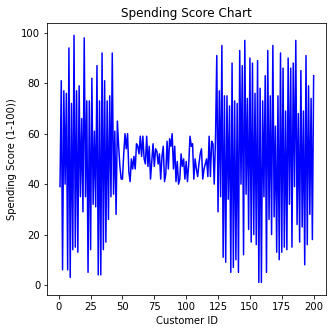

In [24]:
plt.plot(df['CustomerID'], df['Spending Score (1-100)'], color='b')
plt.xlabel('Customer ID')
plt.ylabel('Spending Score (1-100))') 
plt.title('Spending Score Chart')
plt.show()

- We can conclude that the Spending Scores have a very high variation when the Customer Id is < 50 and Customer Id is > 125
- We can target customers with Ids between 50-125 for a good estimate of sales.

- When we use clustering algorithms, choosing the number of clusters is always a challenging task. The squared distance between each point and its cluster center is the required variation. The aim of k-means clustering is to find these k clusters and their centers while reducing the total error.
- We can find the two most common approaches for choosing the number of clusters. 
  1. Elbow Method
  2. Silhouette Analysis 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


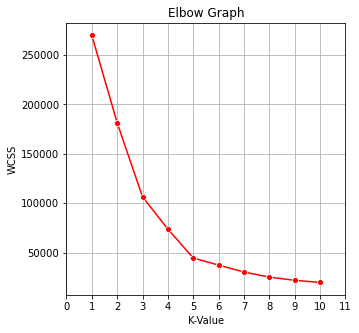

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

- We select the value for K on the basis of the rate of decrease in WCSS. For the above-given graph, the optimum value for K would be 5.  
- We can consider 5 clusters and let the data points separated into 5 classes and these can be represented in different colours as clusters.
- K = 5

The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

1. Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a
2. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b

- The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].
- An above average silhouette width shows a good clustering. The average silhouette method computes the average silhouette of observations for different values of K.

In [26]:
data = df.drop(['CustomerID', 'Gender', 'Age'], axis=1)
# Importing Silhouette Module
from sklearn.metrics import silhouette_score
 
for i in range(2,12):
    # Instantiate k-means
    kmeans = KMeans(n_clusters=i, max_iter=50, random_state=50)
    # Fit the
    kmeans.fit(data)
    # Labels of each cluster point
    cluster_labels = kmeans.labels_
    
    silhoutte_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters = {0}, The Silhouette Score = {1}".format(i, silhoutte_avg))

For n_clusters = 2, The Silhouette Score = 0.2968969162503008
For n_clusters = 3, The Silhouette Score = 0.46761358158775435
For n_clusters = 4, The Silhouette Score = 0.4931963109249047
For n_clusters = 5, The Silhouette Score = 0.553931997444648
For n_clusters = 6, The Silhouette Score = 0.5379675585622219
For n_clusters = 7, The Silhouette Score = 0.5270287298101395
For n_clusters = 8, The Silhouette Score = 0.45732611752686836
For n_clusters = 9, The Silhouette Score = 0.4565077334305076
For n_clusters = 10, The Silhouette Score = 0.4477405371237999
For n_clusters = 11, The Silhouette Score = 0.44510947299367126


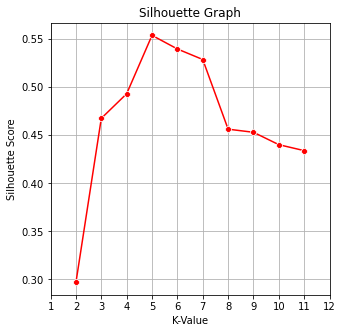

In [27]:
silhouette_coefficients=[]
for i in range(2,12):
    kmeans = KMeans(n_clusters=i)     
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    silhoutte_avg = silhouette_score(data, cluster_labels)
    silhouette_coefficients.append(silhoutte_avg)
plt.grid()
sns.lineplot(x=range(2,12),y=silhouette_coefficients,color="red",marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(1,12.5))
plt.ylabel("Silhouette Score")
plt.title("Silhouette Graph")
plt.show()

- We see that the highest value of Silhouette Score exists for k = 5. Therefore, we conclude that the optimal number of clusters for the data can be 5. 
- K = 5 

- The data points are separated into 5 classes since we have considered K to be 5 and the clusters are represented in the label column.

In [28]:
#Taking 5 clusters and Fitting the input data
km = KMeans(n_clusters=5)
km.fit(df.iloc[:,3:])

KMeans(n_clusters=5)

In [29]:
# Predicting the labels of the input data
df1 = df.copy()
y = km.predict(df1.iloc[:,3:])

# Adding the labels to a column named label at the end
df1["label"] = y
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


#### Scatter plot of the Created Clusters

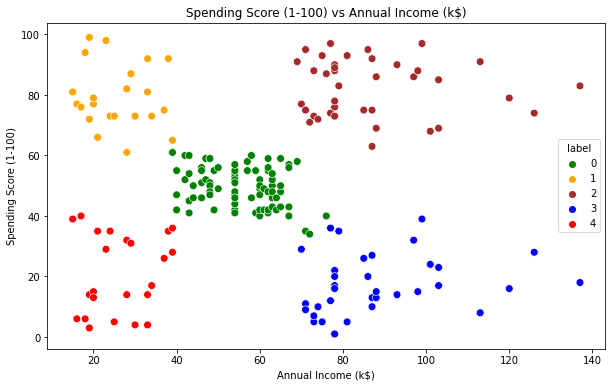

In [30]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                palette=['green','orange','brown','blue','red'], legend='full',
                data = df1, s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [31]:
customer_1 = df1[df1["label"]==1]
print('Number of Customers in 1st group=', len(customer_1))
print('They are -', customer_1["CustomerID"].values)
display(customer_1.iloc[:,:-1])


customer_2 = df1[df1["label"]==2]
print('Number of Customers in 2nd group=', len(customer_2))
print('They are -', customer_2["CustomerID"].values)
display(customer_2.iloc[:,:-1])



customer_3 = df1[df1["label"]==0]
print('Number of Customers in 3rd group=', len(customer_3))
print('They are -', customer_3["CustomerID"].values)
display(customer_3.iloc[:,:-1])


customer_4 = df1[df1["label"]==3]
print('Number of Customers in 4th group=', len(customer_4))
print('They are -', customer_4["CustomerID"].values)
display(customer_4.iloc[:,:-1])



customer_5 = df1[df1["label"]==4]
print('Number of Customers in 5th group=', len(customer_5))
print('They are -', customer_5["CustomerID"].values)
display(customer_5.iloc[:,:-1])



Number of Customers in 1st group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


Number of Customers in 2nd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75
133,134,Female,31,72,71
135,136,Female,29,73,88
137,138,Male,32,73,73
139,140,Female,35,74,72
141,142,Male,32,75,93


Number of Customers in 3rd group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


Number of Customers in 4th group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
124,125,Female,23,70,29
128,129,Male,59,71,11
130,131,Male,47,71,9
134,135,Male,20,73,5
136,137,Female,44,73,7
138,139,Male,19,74,10
140,141,Female,57,75,5
144,145,Male,25,77,12
146,147,Male,48,77,36
148,149,Female,34,78,22


Number of Customers in 5th group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
2,3,Female,20,16,6
4,5,Female,31,17,40
6,7,Female,35,18,6
8,9,Male,64,19,3
10,11,Male,67,19,14
12,13,Female,58,20,15
14,15,Male,37,20,13
16,17,Female,35,21,35
18,19,Male,52,23,29


#### Clusters with respect to Customer ID and other Variables based on Labels

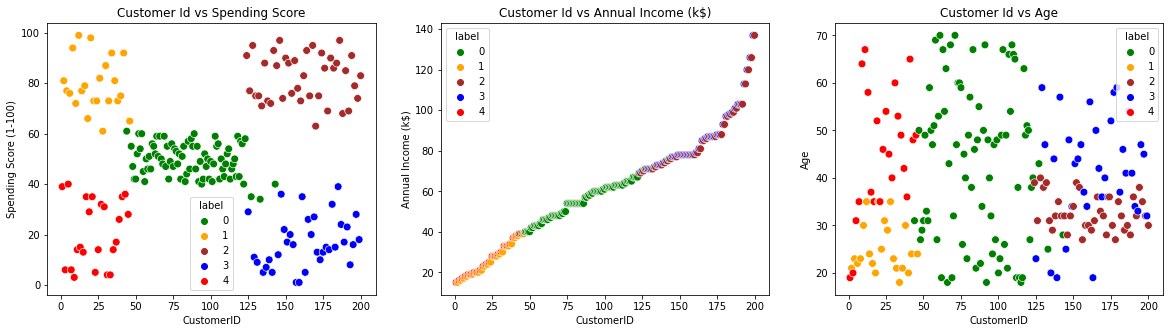

<Figure size 720x432 with 0 Axes>

In [32]:
#Scatterplot of the clusters
fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('')



sns.scatterplot(ax=axes[0], x = 'CustomerID',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','blue','red'], legend='full',data = df1  ,s = 60 )
axes[0].set_title('Customer Id vs Spending Score')


sns.scatterplot(ax=axes[1], x = 'CustomerID',y = 'Annual Income (k$)',hue="label",  
                 palette=['green','orange','brown','blue','red'], legend='full',data = df1  ,s = 60 )
axes[1].set_title('Customer Id vs Annual Income (k$)')



plt.figure(figsize=(10,6))
sns.scatterplot(ax = axes[2], x = 'CustomerID',y = 'Age',hue="label",  
                 palette=['green','orange','brown','blue','red'], legend='full',data = df1  ,s = 60 )
axes[2].set_title('Customer Id vs Age')

plt.show()

#### To visualize relationships between each variable based on the category associated with that variable (label)

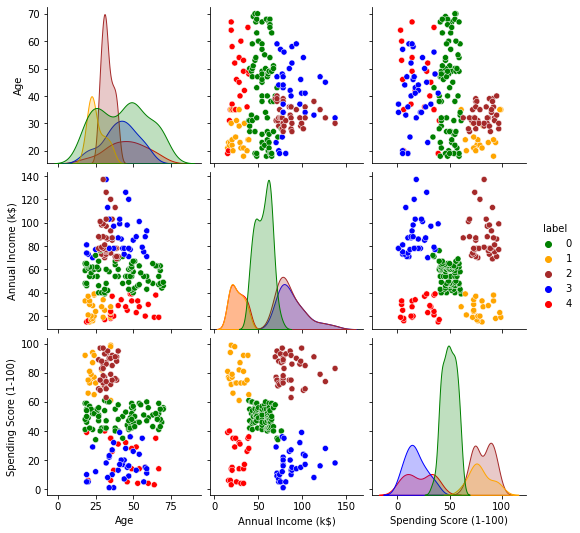

In [33]:
# 2D scatter plot
import seaborn as sns
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)", "label"]
sns.pairplot(df1[columns], hue="label", palette=['green','orange','brown','blue','red'])
plt.show()

- The data points are separated into 5 classes since we have considered K to be 5 and the cluster are represented in the label column.

In [34]:
k = KMeans(n_clusters = 5)
clusters = k.fit_predict(df.iloc[:,2:])
df["label"] = clusters
#The data with labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


#### 3D plot to visualize the Spending Scores of the Customers with their Annual Income based on their Age is plotted below. 
- The data points are separated into 5 classes and these are represented in different colours as shown in the 3D plot.

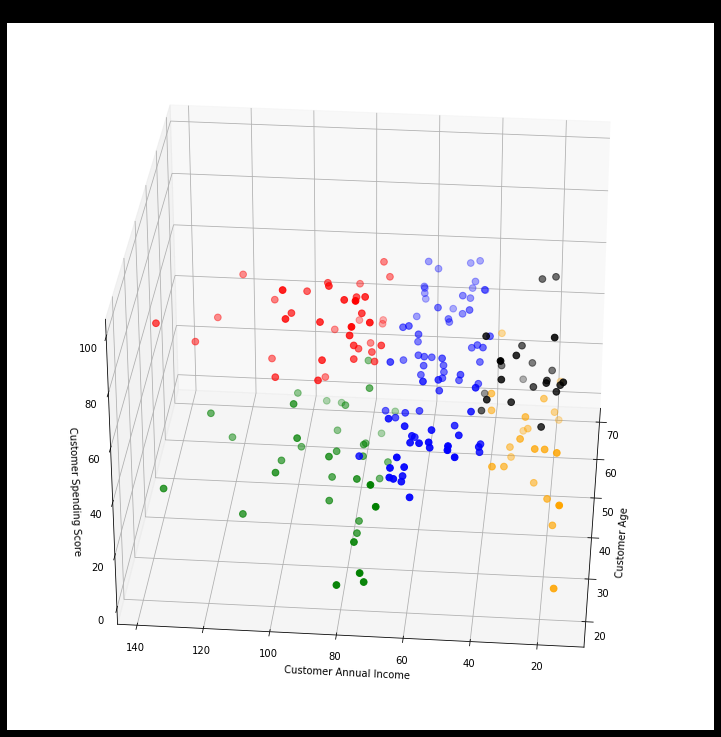

In [35]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,13))
fig.set_facecolor('black')
a = fig.add_subplot(projection='3d')
a.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='red', s = 45)
a.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='blue', s = 45)
a.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s = 45)
a.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='black', s = 45)
a.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='orange', s = 45)
#a.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='brown', s = 45)
a.view_init(30, 185)
plt.xlabel("Customer Age")
plt.ylabel("Customer Annual Income")
a.set_zlabel('Customer Spending Score')
plt.title("Spending Scores vs Annual Income based on Age ")
plt.show()

In [36]:
customer_1 = df[df["label"]==1]
print('Number of Customers in 1st group=', len(customer_1))
print('They are -', customer_1["CustomerID"].values)
display(customer_1.iloc[:,:-1])


customer_2 = df[df["label"]==2]
print('Number of Customers in 2nd group=', len(customer_2))
print('They are -', customer_2["CustomerID"].values)
display(customer_2.iloc[:,:-1])


customer_3 = df[df["label"]==0]
print('Number of Customers in 3rd group=', len(customer_3))
print('They are -', customer_3["CustomerID"].values)
display(customer_3.iloc[:,:-1])



customer_4 = df[df["label"]==3]
print('Number of Customers in 4th group=', len(customer_4))
print('They are -', customer_4["CustomerID"].values)
display(customer_4.iloc[:,:-1])



customer_5 = df[df["label"]==4]
print('Number of Customers in 5th group=', len(customer_5))
print('They are -', customer_5["CustomerID"].values)
display(customer_5.iloc[:,:-1])



Number of Customers in 1st group= 79
They are - [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 127 143]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
50,51,Female,49,42,52
...,...,...,...,...,...
120,121,Male,27,67,56
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35


Number of Customers in 2nd group= 36
They are - [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
124,125,Female,23,70,29
128,129,Male,59,71,11
130,131,Male,47,71,9
132,133,Female,25,72,34
134,135,Male,20,73,5
136,137,Female,44,73,7
138,139,Male,19,74,10
140,141,Female,57,75,5
144,145,Male,25,77,12
146,147,Male,48,77,36


Number of Customers in 3rd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75
133,134,Female,31,72,71
135,136,Female,29,73,88
137,138,Male,32,73,73
139,140,Female,35,74,72
141,142,Male,32,75,93


Number of Customers in 4th group= 23
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


Number of Customers in 5th group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
2,3,Female,20,16,6
4,5,Female,31,17,40
6,7,Female,35,18,6
8,9,Male,64,19,3
10,11,Male,67,19,14
12,13,Female,58,20,15
14,15,Male,37,20,13
16,17,Female,35,21,35
18,19,Male,52,23,29


#### Clusters with respect to Customer ID and other Variables based on Labels

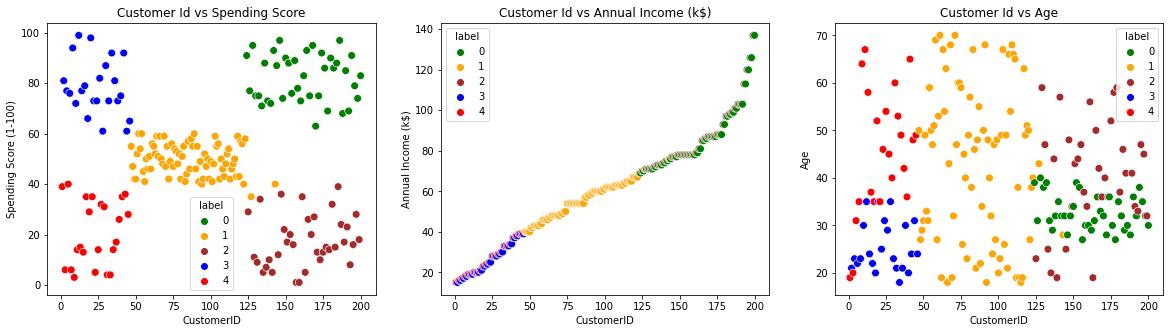

<Figure size 720x432 with 0 Axes>

In [37]:
#Scatterplot of the clusters
fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('')

sns.scatterplot(ax=axes[0], x = 'CustomerID',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','blue','red'], legend='full',data = df  ,s = 60 )
axes[0].set_title('Customer Id vs Spending Score')


sns.scatterplot(ax=axes[1], x = 'CustomerID',y = 'Annual Income (k$)',hue="label",  
                 palette=['green','orange','brown','blue','red'], legend='full',data = df  ,s = 60 )
axes[1].set_title('Customer Id vs Annual Income (k$)')


plt.figure(figsize=(10,6))
sns.scatterplot(ax = axes[2], x = 'CustomerID',y = 'Age',hue="label",  
                 palette=['green','orange','brown','blue','red'], legend='full',data = df  ,s = 60 )
axes[2].set_title('Customer Id vs Age')

plt.show()

### To visualize relationships between each variable based on the category associated with that variable (label)

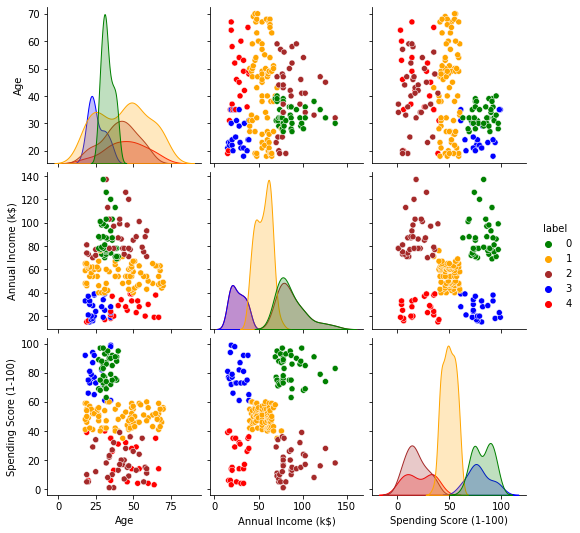

In [38]:
# 2D scatter plot
import seaborn as sns
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)", "label"]
sns.pairplot(df[columns], hue="label", palette=['green','orange','brown','blue','red'])
plt.show()

#### Encoding the Gender Column to Convert Categorical Variable of Gender to Numerical 
- 1 is Male 
- 0 is Female

In [39]:
df2 = pd.read_csv("MallCustomers.csv")
df2 = df2.rename(columns={'Genre': 'Gender'})
df2['Gender'] = pd.get_dummies(df2["Gender"], drop_first=True)
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#### The data points are separated into 5 classes since we have considered K to be 5 and the cluster are represented in the label column.

In [40]:
k = KMeans(n_clusters = 5)
clusters = k.fit_predict(df2.iloc[:,1:])
df2["label"] = clusters
#The data with labels
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,0
1,2,1,21,15,81,3
2,3,0,20,16,6,0
3,4,0,23,16,77,3
4,5,0,31,17,40,0


#### 3D plot to visualize the Spending Scores of the Customers with their Annual Income based on their Age is plotted below. 
- The data points are separated into 5 classes and these are represented in different colours as shown in the 3D plot.

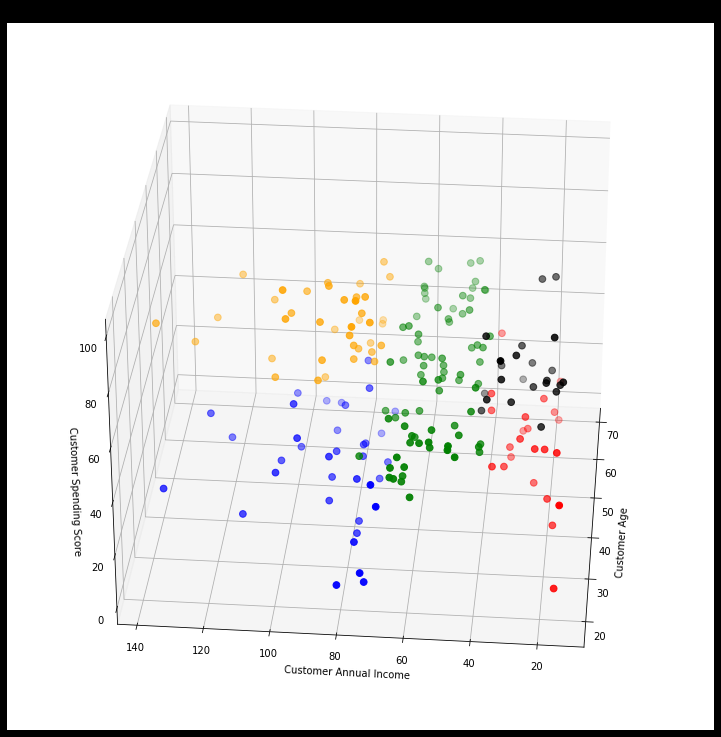

In [41]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,13))
fig.set_facecolor('black')
a = fig.add_subplot(projection='3d')
a.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='red', s = 45)
a.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='blue', s = 45)
a.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='green', s = 45)
a.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='black', s = 45)
a.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='orange', s = 45)
#a.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='brown', s = 45)
a.view_init(30, 185)
plt.xlabel("Customer Age")
plt.ylabel("Customer Annual Income")
a.set_zlabel('Customer Spending Score')
plt.title("Spending Scores vs Annual Income based on Age")
plt.show()

### Plots to visualize the Spending Scores of the Customers with their Annual Income based on their Gender. 
- The data points are separated into 5 classes and these are represented in different colours.

### Scatter plot with clusters for Male and Female Customers

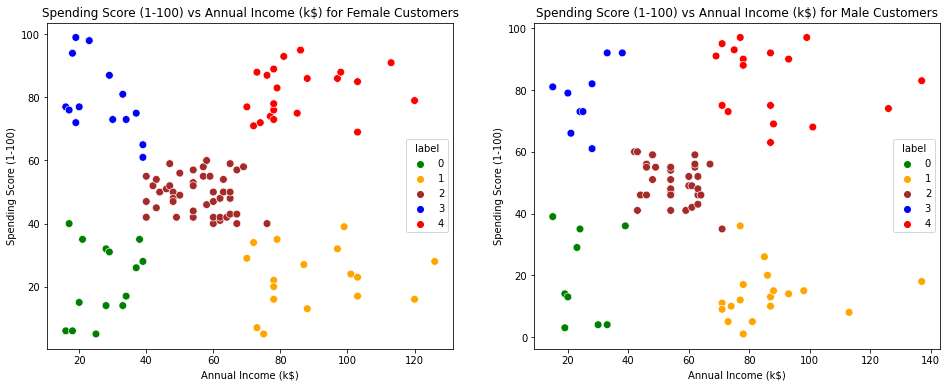

In [42]:
#Scatterplot of the clusters

male = df2.loc[df2['Gender'] == 1]
female = df2.loc[df2['Gender'] == 0]
plt.figure(figsize = (16, 6))

#Scatterplot of the Male Customers
ax1 = plt.subplot(1,2,1)
ax1.set_title('Spending Score (1-100) vs Annual Income (k$) for Female Customers')
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', hue="label",  
                palette=['green','orange','brown','blue','red'], legend='full',
                data = female, s = 60, ax=ax1)

#Scatterplot of the Female Customers
ax2 = plt.subplot(1,2,2)
ax2.set_title('Spending Score (1-100) vs Annual Income (k$) for Male Customers')
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', hue="label",  
                palette=['green','orange','brown','blue','red'], legend='full',
                data = male, s = 60, ax=ax2)

plt.show()

- The analysis shows there is low score concentration of Males with high spending (between 0 and 40 score points). 
- For Females, we have high concentration which ranges between 75 and 100 compared to male gender. In general, women have higher Spending Score than men.
- In other hand, the Annual Income distribution shows that in general, men have higher annual income than women. These two analysis together could give good insights for mall administrators.
- Higher Spending Scores concentrates in low and medium values; In spending score valuation, adults have the highest levels; In gender comparison, young and senior women have higher Spending Score values than young and senior men.

In [43]:
customer_1 = df2[df2["label"]==1]
print('Number of Customers in 1st group=', len(customer_1))
print('They are -', customer_1["CustomerID"].values)
display(customer_1.iloc[:,:-1])


customer_2 = df2[df2["label"]==2]
print('Number of Customers in 2nd group=', len(customer_2))
print('They are -', customer_2["CustomerID"].values)
display(customer_2.iloc[:,:-1])


customer_3 = df2[df2["label"]==0]
print('Number of Customers in 3rd group=', len(customer_3))
print('They are -', customer_3["CustomerID"].values)
display(customer_3.iloc[:,:-1])


customer_4 = df2[df2["label"]==3]
print('Number of Customers in 4th group=', len(customer_4))
print('They are -', customer_4["CustomerID"].values)
display(customer_4.iloc[:,:-1])


customer_5 = df2[df2["label"]==4]
print('Number of Customers in 5th group=', len(customer_5))
print('They are -', customer_5["CustomerID"].values)
display(customer_5.iloc[:,:-1])



Number of Customers in 1st group= 36
They are - [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
124,125,0,23,70,29
128,129,1,59,71,11
130,131,1,47,71,9
132,133,0,25,72,34
134,135,1,20,73,5
136,137,0,44,73,7
138,139,1,19,74,10
140,141,0,57,75,5
144,145,1,25,77,12
146,147,1,48,77,36


Number of Customers in 2nd group= 79
They are - [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 127 143]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
46,47,0,50,40,55
47,48,0,27,40,47
48,49,0,29,40,42
49,50,0,31,40,42
50,51,0,49,42,52
...,...,...,...,...,...
120,121,1,27,67,56
121,122,0,38,67,40
122,123,0,40,69,58
126,127,1,43,71,35


Number of Customers in 3rd group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
2,3,0,20,16,6
4,5,0,31,17,40
6,7,0,35,18,6
8,9,1,64,19,3
10,11,1,67,19,14
12,13,0,58,20,15
14,15,1,37,20,13
16,17,0,35,21,35
18,19,1,52,23,29


Number of Customers in 4th group= 23
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,1,21,15,81
3,4,0,23,16,77
5,6,0,22,17,76
7,8,0,23,18,94
9,10,0,30,19,72
11,12,0,35,19,99
13,14,0,24,20,77
15,16,1,22,20,79
17,18,1,20,21,66
19,20,0,35,23,98


Number of Customers in 5th group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,1,39,69,91
125,126,0,31,70,77
127,128,1,40,71,95
129,130,1,38,71,75
131,132,1,39,71,75
133,134,0,31,72,71
135,136,0,29,73,88
137,138,1,32,73,73
139,140,0,35,74,72
141,142,1,32,75,93


#### Clusters with respect to Customer ID and other Variables based on Labels

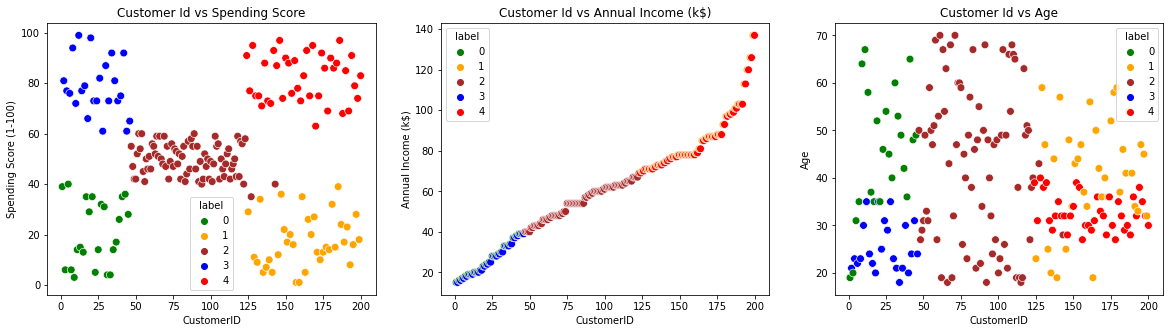

<Figure size 720x432 with 0 Axes>

In [44]:
#Scatterplot of the clusters
fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('')



sns.scatterplot(ax=axes[0], x = 'CustomerID',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','blue','red'], legend='full',data = df2  ,s = 60 )
axes[0].set_title('Customer Id vs Spending Score')


sns.scatterplot(ax=axes[1], x = 'CustomerID',y = 'Annual Income (k$)',hue="label",  
                 palette=['green','orange','brown','blue','red'], legend='full',data = df2  ,s = 60 )
axes[1].set_title('Customer Id vs Annual Income (k$)')


plt.figure(figsize=(10,6))
sns.scatterplot(ax = axes[2], x = 'CustomerID',y = 'Age',hue="label",  
                 palette=['green','orange','brown','blue','red'], legend='full',data = df2, s = 60)
axes[2].set_title('Customer Id vs Age')

plt.show()

#### To visualize relationships between each variable based on the category associated with that variable (label)

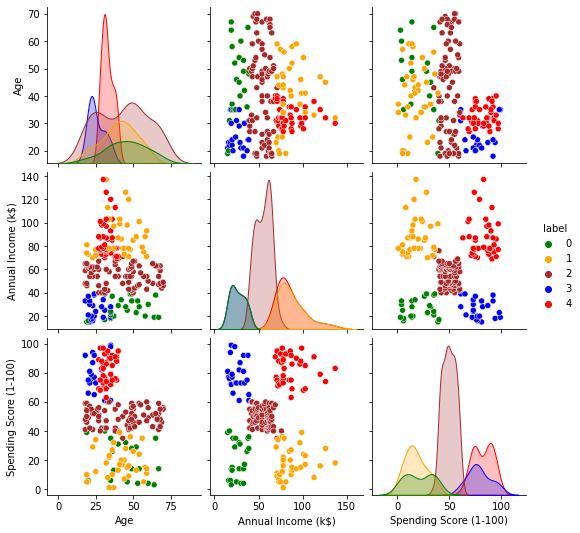

In [45]:
# 2D scatter plot
import seaborn as sns
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)", "label"]
sns.pairplot(df2[columns], hue="label", palette=['green','orange','brown','blue','red'])
plt.show()